# Titanic - Machine Learning from Disaster

Este notebook busca resolver o problema do [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) proposto pela plataforma Kaggle.

<img src="https://www.magazine-hd.com/apps/wp/wp-content/uploads/2020/04/titanic-ng.jpg" alt="titanic" width="400" style="margin-left:auto; margin-right: auto;"/>

### Dados

A plataforma disponibiliza três arquivos:

- `train.csv` - Dataframe para treino.
- `test.csv` - Dataframe para as predições.
- `gender_submission.csv` - Um exemplo de como deve ser o dataframe para submissão.

Para isso foi utilizado o método de classificação `Random Forest`. Para a aplicação foi utilizado a biblioteca sklearn, pra mais informações clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('./train.csv')

Ao abrir o arquivo `train.csv` nos deparamos com as seguintes colunas:

- `PassengerID` - O ID do passageiro a bordo.
- `Survived` - Informações se o passageiro sobreviveu `1` ou não `0`.
- `Pclass` - Classe do passageiro `1` - primeira `2` - segunda e `3` - terceira.
- `Name` - O nome do passageiro.
- `Sex` - O sexo do passageiro.
- `SibSp` - Número de esposas/irmãos do passageiro a bordo.
- `Age` - A idade do passageiro.
- `Parch` - Número de pais/filhos do passageiro a bordo.
- `Ticket` - Código do Ticket.
- `Fare` - Quanto o passageiro pagou na passagem.
- `Cabin` - Número da cabine.
- `Embarked` - Ponto de embarcação (C - Cherbourg, Q - Queenstown, S - Southampton).

In [3]:
train_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


Temos 12 features e 891 linhas.

In [4]:
print(train_df.shape)

(891, 12)


### Vamos analisar as dimensões

#### Sexo e Idade:

In [5]:
import matplotlib.pyplot as plt

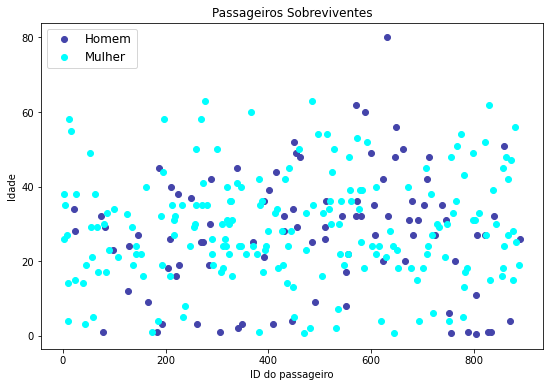

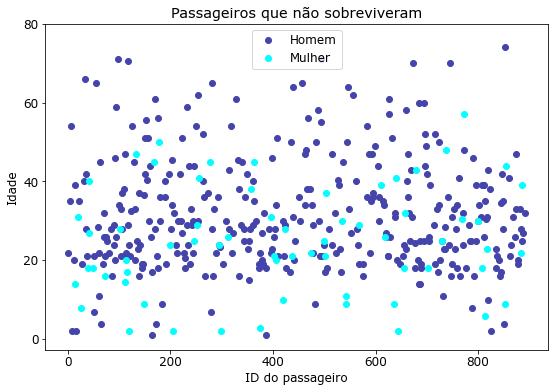

In [6]:
plt.figure(figsize=(9,6))

# GRÁFICO DE DISPERSÃO DOS QUE SOBREVIVERAM
people_who_survived = train_df.loc[train_df['Survived'] == 1]
people_who_survived_men = people_who_survived[people_who_survived['Sex'] == 'male']
people_who_survived_women =  people_who_survived[people_who_survived['Sex'] == 'female']

plt.scatter(people_who_survived_men['PassengerId'], people_who_survived_men['Age'], color="#4444aa")
plt.scatter(people_who_survived_women['PassengerId'], people_who_survived_women['Age'], color="cyan")
plt.yticks(np.arange(np.floor(train_df['Age'].min()), np.ceil(train_df['Age'].max() + 1), 20))

plt.title("Passageiros Sobreviventes")
plt.rcParams["font.family"] = "Verdana"
plt.rcParams["font.size"] = 12
plt.xlabel("ID do passageiro")
plt.legend(["Homem", "Mulher"], loc=2)
plt.ylabel("Idade")
plt.show()
plt.close()

# GRÁFICO DE DISPERSÃO DOS QUE NÃO SOBREVIVERAM
plt.figure(figsize=(9,6))

# substituindo as idades


people_who_not_survived = train_df.loc[train_df['Survived'] == 0]
people_who_not_survived_men = people_who_not_survived[people_who_not_survived['Sex'] == 'male']
people_who_not_survived_women =  people_who_not_survived[people_who_not_survived['Sex'] == 'female']

plt.scatter(people_who_not_survived_men['PassengerId'], people_who_not_survived_men['Age'], color="#4444aa")
plt.scatter(people_who_not_survived_women['PassengerId'], people_who_not_survived_women['Age'], color="cyan")
plt.yticks(np.arange(np.floor(train_df['Age'].min()), np.ceil(train_df['Age'].max() + 1), 20))

plt.title("Passageiros que não sobreviveram")
plt.rcParams["font.family"] = "Verdana"
plt.rcParams["font.size"] = 12
plt.xlabel("ID do passageiro")
plt.legend(["Homem", "Mulher"], loc=9)
plt.ylabel("Idade")
plt.show()
plt.close()


In [7]:
percentage_who_survived_men = people_who_survived_men['Survived'].shape[0]/train_df[train_df['Sex'] == "male"].shape[0]
percentage_who_not_survived_men =  people_who_not_survived_men['Survived'].shape[0]/train_df[train_df['Sex'] == "male"].shape[0]

percentage_who_survived_women = people_who_survived_women['Survived'].shape[0]/train_df[train_df['Sex'] == "female"].shape[0]
percentage_who_not_survived_women = people_who_not_survived_women['Survived'].shape[0]/train_df[train_df['Sex'] == "female"].shape[0]

In [8]:
print("Porcentagem de homens que sobreviveram: {:.2f}%".format(percentage_who_survived_men*100))
print("Porcentagem de homens que não sobreviveram: {:.2f}%".format(percentage_who_not_survived_men*100))
print("\n")
print("Porcentagem de mulheres que sobreviveram: {:.2f}%".format(percentage_who_survived_women*100))
print("Porcentagem de mulheres que não sobreviveram: {:.2f}%".format(percentage_who_not_survived_women*100))

Porcentagem de homens que sobreviveram: 18.89%
Porcentagem de homens que não sobreviveram: 81.11%


Porcentagem de mulheres que sobreviveram: 74.20%
Porcentagem de mulheres que não sobreviveram: 25.80%


Com base nos dados acima homens morreram muito mais que mulheres, a faixa etária dos não sobreviventes também parece não estar muito bem definida. Conclui-se que esses dois features estão ligados se sobreviveram ou não.

###  Número de esposas/irmãos do passageiro a bordo (SibSp)

In [9]:
grouped_by_sibsp_survived = people_who_survived.loc[:, ['Survived', 'SibSp']].groupby('SibSp')
grouped_by_sibsp_not_survived = people_who_not_survived.loc[:, ['Survived', 'SibSp']].groupby('SibSp')

count_survived_by_sibsp = grouped_by_sibsp_survived.count()
count_survived_by_sibsp.columns = ['Count Survived']
count_not_survived_by_sibsp = grouped_by_sibsp_not_survived.count()
count_not_survived_by_sibsp.columns = ['Count Not Survived']

In [10]:
count_survived_by_sibsp

,Count Survived
SibSp,
0,210
1,112
2,13
3,4
4,3


In [11]:
count_not_survived_by_sibsp

,Count Not Survived
SibSp,
0,398
1,97
2,15
3,12
4,15
5,5
8,7


In [12]:
check_count = count_not_survived_by_sibsp.sum()[0] + count_survived_by_sibsp.sum()[0]
check_count

891

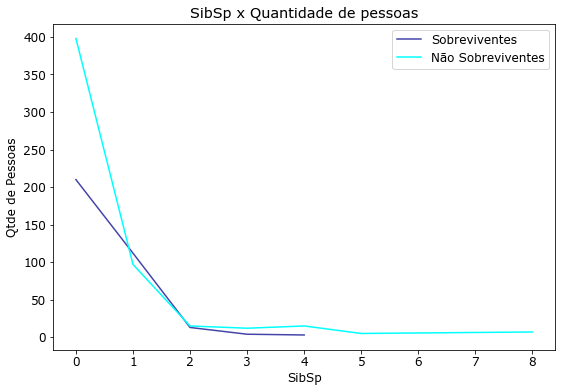

In [13]:
plt.figure(figsize=(9,6))
ax = plt.axes()

X = [count_survived_by_sibsp.index, count_not_survived_by_sibsp.index]
y = [count_survived_by_sibsp.values, count_not_survived_by_sibsp.values]

ax.plot(X[0], y[0],color="#4444aa")
ax.plot(X[1], y[1], color="cyan")

plt.xticks(np.arange(0,9,1))
plt.xlabel

plt.legend(['Sobreviventes', 'Não Sobreviventes'])
plt.title("SibSp x Quantidade de pessoas")
plt.xlabel("SibSp")
plt.ylabel("Qtde de Pessoas")
plt.show()
plt.close()

## Parch

In [14]:
grouped_by_parch_survived = people_who_survived.loc[:, ['Survived', 'Parch']].groupby('Parch')
grouped_by_parch_not_survived = people_who_not_survived.loc[:, ['Survived', 'Parch']].groupby('Parch')

count_survived_by_parch = grouped_by_sibsp_survived.count()
count_survived_by_parch.columns = ['Quantidade que sobreviveram']
count_not_survived_by_parch = grouped_by_sibsp_not_survived.count()
count_not_survived_by_parch.columns = ['Quantidade que não sobreviveram']

In [15]:
count_survived_by_parch

,Quantidade que sobreviveram
SibSp,
0,210
1,112
2,13
3,4
4,3


In [16]:
count_not_survived_by_parch

,Quantidade que não sobreviveram
SibSp,
0,398
1,97
2,15
3,12
4,15
5,5
8,7


In [17]:
check_count = count_not_survived_by_parch.sum()[0] + count_survived_by_parch.sum()[0]
check_count

891

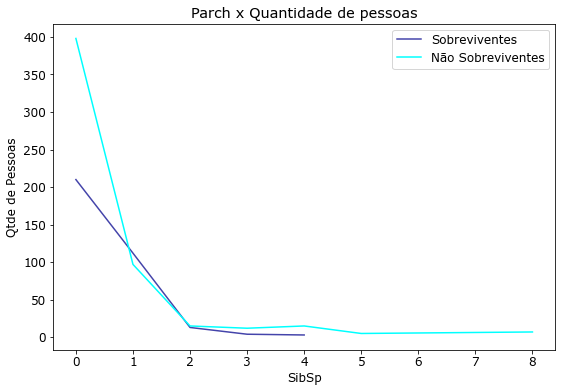

In [18]:
plt.figure(figsize=(9,6))
ax = plt.axes()

X = [count_survived_by_parch.index, count_not_survived_by_parch.index]
y = [count_survived_by_parch.values, count_not_survived_by_parch.values]

ax.plot(X[0], y[0],color="#4444aa")
ax.plot(X[1], y[1], color="cyan")

plt.xticks(np.arange(0,9,1))
plt.xlabel

plt.legend(['Sobreviventes', 'Não Sobreviventes'])
plt.title("Parch x Quantidade de pessoas")
plt.xlabel("SibSp")
plt.ylabel("Qtde de Pessoas")
plt.show()
plt.close()

## Pclass

In [19]:
grouped_by_pclass_survived = people_who_survived.loc[:, ['Survived', 'Pclass']].groupby('Pclass')
grouped_by_pclass_not_survived = people_who_not_survived.loc[:, ['Survived', 'Pclass']].groupby('Pclass')

count_survived_by_pclass = grouped_by_pclass_survived.count()
count_survived_by_pclass.columns = ['Quantidade que sobreviveram']
count_not_survived_by_pclass = grouped_by_pclass_not_survived.count()
count_not_survived_by_pclass.columns = ['Quantidade que não sobreviveram']

In [20]:
count_not_survived_by_pclass

,Quantidade que não sobreviveram
Pclass,
1,80
2,97
3,372


In [21]:
count_survived_by_pclass

,Quantidade que sobreviveram
Pclass,
1,136
2,87
3,119


In [22]:
check_count = count_not_survived_by_pclass.sum()[0] + count_survived_by_pclass.sum()[0]
check_count

891

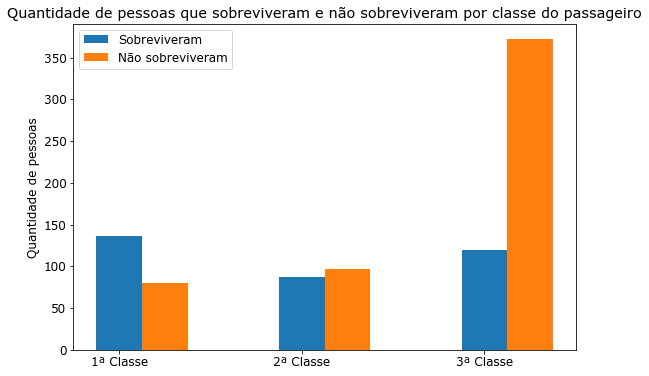

In [23]:
N = np.arange(3)
labels = ['1ª Classe', '2ª Classe', '3ª Classe']

list_count_survived_by_pclass = [elem[0] for elem in count_survived_by_pclass.values.tolist()]
list_count_not_survived_by_pclass = [elem[0] for elem in count_not_survived_by_pclass.values.tolist()]
fig, ax = plt.subplots(figsize=(9,6))
rects1 = ax.bar(N, list_count_survived_by_pclass, label='Sobreviveram',  width=0.25)
rects2 = ax.bar(N+0.25, list_count_not_survived_by_pclass, label='Não sobreviveram', width=0.25)

plt.ylabel('Quantidade de pessoas')
plt.title('Quantidade de pessoas que sobreviveram e não sobreviveram por classe do passageiro')
plt.xticks([0, 1, 2])
ax.set_xticklabels(labels)
plt.legend()

plt.show()
plt.close()

## Embarked

In [24]:
print(people_who_survived[people_who_survived['Embarked'].notna()]['Embarked'].unique().tolist(), people_who_not_survived[people_who_not_survived['Embarked'].notna()]['Embarked'].unique().tolist())

['C', 'S', 'Q'] ['S', 'Q', 'C']


In [25]:
grouped_by_embarked_survived = people_who_survived.loc[:, ['Survived', 'Embarked']].groupby('Embarked')
grouped_by_embarked_not_survived = people_who_not_survived.loc[:, ['Survived', 'Embarked']].groupby('Embarked')

count_survived_by_embarked = grouped_by_embarked_survived.count()
count_survived_by_embarked.index = people_who_survived[people_who_survived['Embarked'].notna()]['Embarked'].unique()
count_survived_by_embarked.columns = ['Quantidade que sobreviveram']
count_not_survived_by_embarked = grouped_by_embarked_not_survived.count()
count_not_survived_by_embarked.index = people_who_not_survived[people_who_not_survived['Embarked'].notna()]['Embarked'].unique().tolist()
count_not_survived_by_embarked.columns = ['Quantidade que não sobreviveram']

In [26]:
count_survived_by_embarked

,Quantidade que sobreviveram
C,93
S,30
Q,217


In [27]:
count_not_survived_by_embarked

,Quantidade que não sobreviveram
S,75
Q,47
C,427


In [28]:
check_count = count_not_survived_by_embarked.sum()[0] + count_survived_by_embarked.sum()[0]
check_count

# - 2 na

889

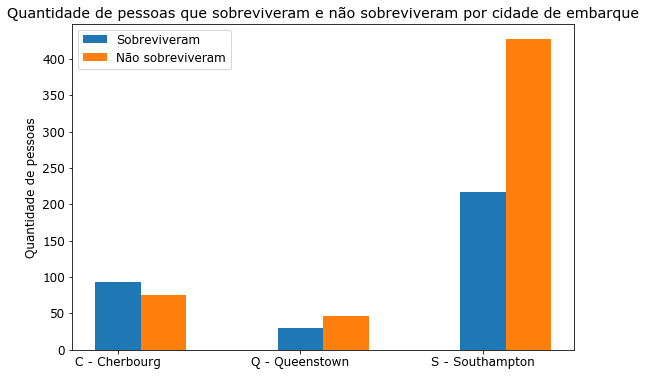

In [29]:
N = np.arange(3)
labels = ['C - Cherbourg', 'Q - Queenstown', 'S - Southampton']

list_count_survived_by_embarked = [elem[0] for elem in count_survived_by_embarked.values.tolist()]
list_count_not_survived_by_embarked = [elem[0] for elem in count_not_survived_by_embarked.values.tolist()]
fig, ax = plt.subplots(figsize=(9,6))
rects1 = ax.bar(N, list_count_survived_by_embarked, label='Sobreviveram',  width=0.25)
rects2 = ax.bar(N+0.25, list_count_not_survived_by_embarked, label='Não sobreviveram', width=0.25)

plt.ylabel('Quantidade de pessoas')
plt.title('Quantidade de pessoas que sobreviveram e não sobreviveram por cidade de embarque')
plt.xticks([0, 1, 2])
ax.set_xticklabels(labels)
plt.legend()

plt.show()

## Fare

### Histograma dos que sobreviveram

Text(0.5, 1.0, 'Quantidade de pessoas sobreviventes vs Unidades monetárias pagas na passagem')

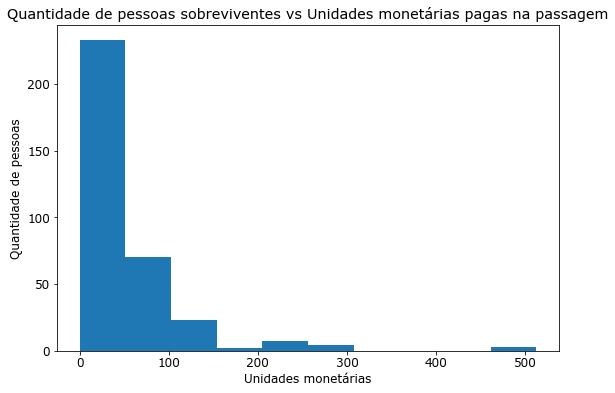

In [30]:
plt.figure(figsize=(9,6))
plt.hist(people_who_survived['Fare'], bins=10)

plt.ylabel('Quantidade de pessoas')
plt.xlabel('Unidades monetárias')
plt.title('Quantidade de pessoas sobreviventes vs Unidades monetárias pagas na passagem')

### Histograma dos que não sobreviveram

Text(0.5, 1.0, 'Quantidade de pessoas não sobreviventes vs Unidades monetárias pagas na passagem')

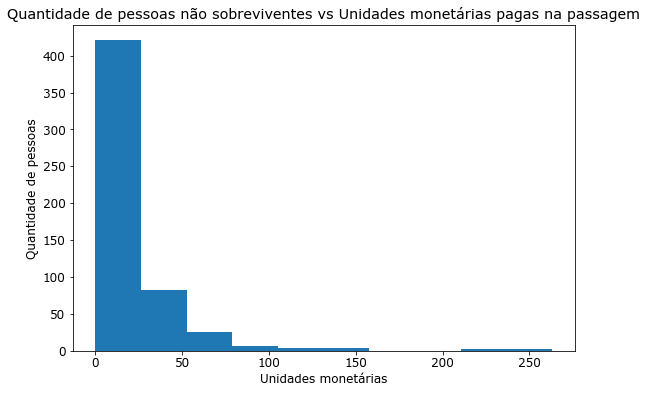

In [31]:
plt.figure(figsize=(9,6))
plt.hist(people_who_not_survived['Fare'], bins=10)

plt.ylabel('Quantidade de pessoas')
plt.xlabel('Unidades monetárias')
plt.title('Quantidade de pessoas não sobreviventes vs Unidades monetárias pagas na passagem')

## O Modelo

Com base nos parâmetros apresentados, vamos ao modelo considerando as seguintes features para treino [`Pclass`, `Sex`, `SibSp`, `Parch`], que são os features que supostamente que no parecer estão interligadas com sobrevivência ou não de um passageiro.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_df = pd.read_csv('./train.csv')
train_df = train_df.fillna(train_df.mean())


X_train = train_df.loc[:, ['Pclass', 'Sex', 'SibSp', 'Parch']]
X_train = pd.get_dummies(X_train, columns=['Pclass', 'Sex', 'SibSp', 'Parch'], prefix=['Pclass', 'Sex', 'SibSp', 'Parch'])
X_train['Parch_9'] = 0
y_train = train_df.loc[:, ['Survived']]

In [71]:
clf = RandomForestClassifier(n_estimators=150, max_depth=3, random_state=2)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, n_estimators=150, random_state=2)

In [72]:
test_df = pd.read_csv('./test.csv')
test_df = test_df.fillna(test_df.mean())

X_test = test_df.loc[:, ['Pclass', 'Sex', 'SibSp', 'Parch']]
X_test = pd.get_dummies(X_test, columns=['Pclass', 'Sex', 'SibSp', 'Parch'], prefix=['Pclass', 'Sex', 'SibSp', 'Parch'])

y_pred = clf.predict(X_test)


In [73]:
from sklearn.metrics import accuracy_score

submission = pd.read_csv('./gender_submission.csv')
y_test = submission['Survived']

submission.to_csv('./result.csv', index=False)